In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scout.utils import read_csv
from scipy import stats

In [234]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/arlotta_vs_lancaster/'
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
analysis = analysis.where(analysis['type'] == 'Arlotta_d56').dropna()
analysis.head()

,type
path,
20190722_16_28_25_ef26_org1_488LP15_561LP140_642LP40,Arlotta_d56
20190722_17_48_57_ef26_org2_488LP14_561LP140_642LP40,Arlotta_d56
20190722_18_32_43_ef26_org3_488LP14_561LP140_642LP40,Arlotta_d56
20190722_19_18_01_ef26_org4_488LP14_561LP140_642LP40,Arlotta_d56
20190723_11_41_12_ef26_org5_488LP14_561LP140_642LP40,Arlotta_d56


In [235]:
dfs = []
for i, org_path in enumerate(analysis.index):
    folder = analysis.loc[org_path]['type']
    path = os.path.join(working_dir, folder, org_path, 'individual_ventricle_cellfreq.xlsx')
    df = pd.read_excel(path, index_col=0)
    path2 = os.path.join(working_dir, folder, org_path, 'individual_ventricle_cyto.xlsx')
    df2 = pd.read_excel(path2, index_col=0)
    df['org_name'] = len(df) * [org_path]
    df['org_idx'] = len(df) * [i]
    df['dist'] = df2['dist']
    dfs.append(df)
df = pd.concat(dfs).dropna()
df.head()

,sox2_count,tbr1_count,dn_count,sox2_freq,tbr1_freq,dn_freq,eq_diam,volume,org_name,org_idx,dist
0,114097,810913,627384,0.073497,0.522363,0.404140,214.296209,5.152786e+06,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,271.279220
1,421,5782,6063,0.034323,0.471384,0.494293,6.105802,1.191864e+02,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,206.954040
2,75775,207467,210469,0.153480,0.420220,0.426300,108.649523,6.715558e+05,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,227.551370
3,71840,220954,157614,0.159500,0.490564,0.349936,119.221489,8.872832e+05,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,241.857342
4,476,18494,21412,0.011787,0.457976,0.530236,35.677164,2.377769e+04,20190722_16_28_25_ef26_org1_488LP15_561LP140_6...,0,79.955214


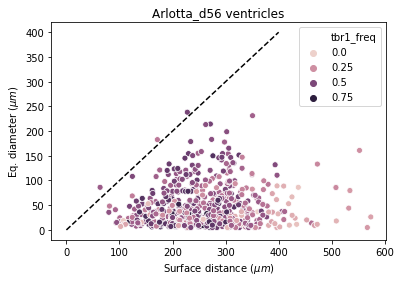

In [236]:
sns.scatterplot(x='dist', y='eq_diam', data=df, hue='tbr1_freq')
plt.plot([0, 400], [0, 400] ,'k--')
plt.xlabel('Surface distance ($\mu m$)')
plt.ylabel('Eq. diameter ($\mu m$)')
plt.title(str(analysis['type'].iloc[0]) + ' ventricles')
plt.show()

In [237]:
r_tbr1, p_tbr1 = stats.pearsonr(df['eq_diam'], df['dist'])
r_tbr1, p_tbr1

(0.0934180401720388, 0.027621115181306683)

Size-adjusted distance to surface

In [238]:
df['dist_adj'] = df['dist'] - df['eq_diam']/2

In [245]:
sns.color_palette('coolwarm')

[(0.4044212904941176, 0.5346434904470588, 0.9320019126352941),
 (0.603162067917647, 0.7315274773529412, 0.9995652785372549),
 (0.7867207013568628, 0.8448072103686275, 0.9398103849490196),
 (0.9306685963333333, 0.818876999654902, 0.7591463906980392),
 (0.9673165156666667, 0.6574708288078431, 0.5381601507294118),
 (0.8846434386941177, 0.41001709788235297, 0.32250654924705885)]

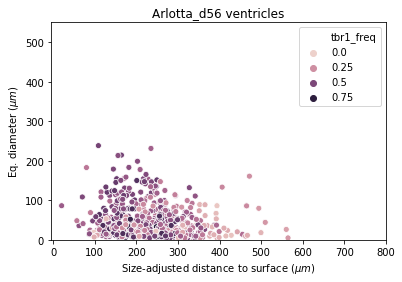

In [253]:
sns.scatterplot(x='dist_adj', y='eq_diam', data=df, hue='tbr1_freq')
plt.xlabel('Size-adjusted distance to surface ($\mu m$)')
plt.ylabel('Eq. diameter ($\mu m$)')
plt.title(str(analysis['type'].iloc[0]) + ' ventricles')
plt.xlim([-5, 800])
plt.ylim([0, 550])
plt.show()

In [191]:
data_flatten = {'freq': pd.concat([df['sox2_freq'], df['tbr1_freq'], df['dn_freq']]),
                'type': len(df) * ['SOX2'] + len(df) * ['TBR1'] + len(df) * ['DN'],
                'eq_diam': 3 * list(df['eq_diam']),
                'dist_adj': 3 * list(df['dist_adj'])}
df_flatten = pd.DataFrame(data_flatten)

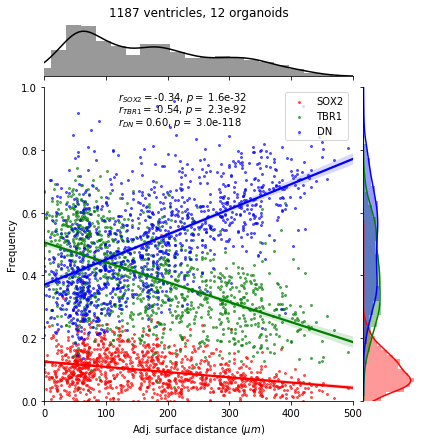

In [200]:
p = sns.JointGrid(x='dist_adj', y='sox2_freq', data=df)

sns.regplot(x='dist_adj', y='sox2_freq', data=df, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='dist_adj', y='tbr1_freq', data=df, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='dist_adj', y='dn_freq', data=df, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_flatten['dist_adj'], ax=p.ax_marg_x, color='k')
sns.distplot(df['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([0, 500])
p.ax_joint.set_ylim([0, 1])
p.ax_joint.legend()
p.ax_marg_x.set_title("{} ventricles, {} organoids".format(len(df), len(df['org_idx'].unique())))
p.ax_joint.set_xlabel('Adj. surface distance ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# # Get pearson correlations

r_sox2, p_sox2 = stats.pearsonr(df['dist_adj'], df['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df['dist_adj'], df['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df['dist_adj'], df['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [120, 0.96])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [120, 0.92])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [120, 0.88])

plt.savefig(os.path.join(working_dir, 'ventricle_depth_vs_celltypes.pdf'), bbox_inches='tight')

plt.show()

In [172]:
r_eqdiam, p_eqdiam = stats.pearsonr(df['dist_adj'], df['eq_diam'])
r_eqdiam, p_eqdiam

(-0.4666597306419497, 1.4854259928733819e-25)

In [173]:
data_flatten = {'freq': pd.concat([df['sox2_freq'], df['tbr1_freq'], df['dn_freq']]),
                'type': len(df) * ['SOX2'] + len(df) * ['TBR1'] + len(df) * ['DN'],
                'eq_diam': 3 * list(df['eq_diam']),
                'dist': 3 * list(df['dist']),
                'dist_adj': 3 * list(df['dist_adj'])}
df_flatten = pd.DataFrame(data_flatten)

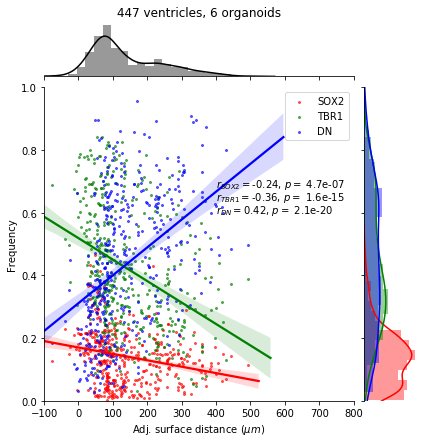

In [174]:
p = sns.JointGrid(x='dist_adj', y='freq', data=df_flatten)

sns.regplot(x='dist_adj', y='sox2_freq', data=df, ax=p.ax_joint, color='r', scatter_kws={'s': 4, 'alpha': 0.6}, label='SOX2')
sns.regplot(x='dist_adj', y='tbr1_freq', data=df, ax=p.ax_joint, color='g', scatter_kws={'s': 4, 'alpha': 0.6}, label='TBR1')
sns.regplot(x='dist_adj', y='dn_freq', data=df, ax=p.ax_joint, color='b', scatter_kws={'s': 4, 'alpha': 0.6}, label='DN')

sns.distplot(df_flatten['dist_adj'], ax=p.ax_marg_x, color='k')
sns.distplot(df['sox2_freq'], ax=p.ax_marg_y, color='r', vertical=True)
sns.distplot(df['tbr1_freq'], ax=p.ax_marg_y, color='g', vertical=True)
sns.distplot(df['dn_freq'], ax=p.ax_marg_y, color='b', vertical=True)

p.ax_joint.set_xlim([-100, 800])
p.ax_joint.set_ylim([0, 1])
p.ax_marg_x.set_title("{} ventricles, {} organoids".format(len(df), len(df['org_idx'].unique())))
p.ax_joint.set_xlabel('Adj. surface distance ($\mu m$)')
p.ax_marg_x.set_xlabel(None)
p.ax_joint.set_ylabel('Frequency')
p.ax_marg_y.set_ylabel(None)

# Get pearson correlations
r_sox2, p_sox2 = stats.pearsonr(df['dist_adj'], df['sox2_freq'])
r_tbr1, p_tbr1 = stats.pearsonr(df['dist_adj'], df['tbr1_freq'])
r_dn, p_dn = stats.pearsonr(df['dist_adj'], df['dn_freq'])

p.ax_joint.annotate('$r_{SOX2}=$' + f'{r_sox2:0.2f}, $p=$ {p_sox2:.1e}', [400, 0.68])
p.ax_joint.annotate('$r_{TBR1}=$' + f'{r_tbr1:0.2f}, $p=$ {p_tbr1:.1e}', [400, 0.64])
p.ax_joint.annotate('$r_{DN}=$' + f'{r_dn:0.2f}, $p=$ {p_dn:.1e}', [400, 0.6])

p.ax_joint.legend()

plt.show()